## 4. Методы машинного обучения: базовый уровень

In [2]:
import pandas as pd
import seaborn as sns

In [36]:
data = pd.read_csv("https://stepik.org/media/attachments/lesson/802033/students.csv")

### 4.1 Задача предсказания и регрессия

In [4]:
from sklearn.linear_model import LinearRegression

In [37]:
df_cut = data.copy()[["Growth", "Shoe size"]]
df_cut = df_cut.dropna()

<Axes: xlabel='Shoe size', ylabel='Growth'>

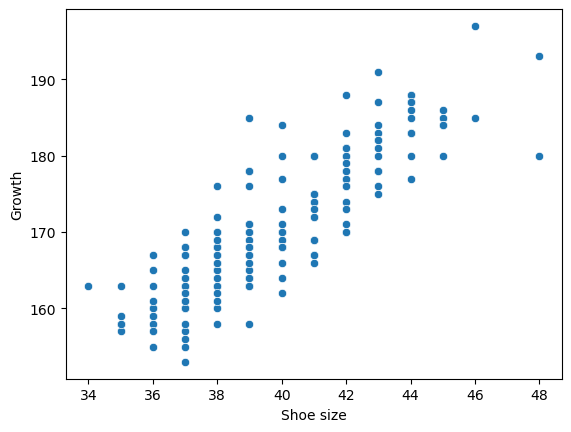

In [38]:
sns.scatterplot(data=df_cut, x="Shoe size", y="Growth")

Гипотеза: рост линейно зависит от размера обуви

In [74]:
linearRegression = LinearRegression()
results = linearRegression.fit(
    df_cut["Shoe size"].values.reshape(-1, 1), y=df_cut["Growth"].values
)

In [76]:
results.coef_

array([2.77717058])

In [77]:
results.intercept_

60.3658112573673

In [78]:
df_cut["Predicted growth"] = results.predict(df_cut["Shoe size"].values.reshape(-1, 1))

In [79]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_cut["Growth"], df_cut["Predicted growth"])

3.450698681998387

Другая задача

In [80]:
df_cut_1 = data[
    ["Middle and ring finger", "MIddle and index finger", "Middle and little finger"]
].copy().dropna()

In [81]:
results_1 = linearRegression.fit(
    df_cut_1[["Middle and ring finger", "Middle and little finger"]].values.reshape(-1,2),
    y=df_cut_1["MIddle and index finger"].values,
)

In [82]:
results_1.coef_

array([0.10731496, 0.04389948])

In [83]:
results_1.intercept_

7.436145518798954

In [84]:
df_cut_1["Predicted"] = results_1.predict(
    df_cut_1[["Middle and ring finger", "Middle and little finger"]].values.reshape(
        -1, 2
    )
)

In [85]:
mean_absolute_error(df_cut_1["MIddle and index finger"], df_cut_1["Predicted"])

3.094567105647603

In [86]:
df_cut_1

,Middle and ring finger,MIddle and index finger,Middle and little finger,Predicted
0,10.0,20,40.0,10.265274
1,5.0,5,20.0,8.850710
2,10.0,13,26.0,9.650682
3,13.5,12,35.0,10.421379
4,11.0,10,22.0,9.582399
...,...,...,...,...
181,23.0,13,45.0,11.879866
182,9.0,8,15.0,9.060472
183,16.0,9,35.0,10.689667
184,15.0,9,25.0,10.143357


Для алгоритмов предсказания нужна тестовая выборка. Это должны быть новые данные (с известными ответами), но которые не использовались при тренировке модели. 

In [87]:
test_data = pd.read_csv(
    "https://stepik.org/media/attachments/lesson/802417/students_test.csv"
)

Создайте таблицу df_cut, в которой будут только столбцы 'Age','Year of birth', 'Month of birthday' из файла students.csv   
Запустите модель линейной регрессии, которая будет решать задачу предсказания признака 'Age' (целевой) по признакам 'Year of birth', 'Month of birthday' (нецелевые).

In [88]:
df_cut_2 = data[["Age", "Year of birth", "Month of birthday"]].copy().dropna()

In [89]:
results_2 = linearRegression.fit(
    df_cut_2[["Year of birth", "Month of birthday"]].values.reshape(-1, 2),
    y=df_cut_2["Age"].values,
)

In [90]:
results_2.coef_

array([-0.00145442,  0.10005863])

In [91]:
results_2.intercept_

22.929930296699347

In [92]:
test_data["Predicted_age"] = results_2.predict(
    test_data[["Year of birth", "Month of birthday"]].values.reshape(-1, 2)
)

In [93]:
test_data[["Age", "Predicted_age", "Year of birth", "Month of birthday"]]

,Age,Predicted_age,Year of birth,Month of birthday
0,22,20.621444,2000,6
1,20,20.318359,2002,3
2,21,20.619989,2001,6
3,21,20.720048,2001,7
4,22,20.521385,2000,5
...,...,...,...,...
93,20,20.218300,2002,2
94,22,20.421326,2000,4
95,22,20.421326,2000,4
96,20,20.920165,2001,9


In [95]:
mean_absolute_error(test_data["Age"], test_data["Predicted_age"])

1.605496000066093

### 4.2 Алгоритмы классификации

#### Метод K-ближайших соседей

In [96]:
df_cut = data[["Growth", "Weight", "Sex"]].copy().dropna()

<Axes: xlabel='Weight', ylabel='Growth'>

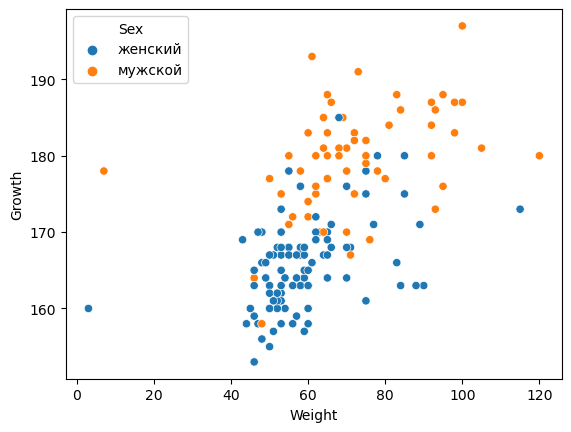

In [98]:
sns.scatterplot(data=df_cut, x="Weight", y="Growth", hue="Sex")

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [100]:
scaler = StandardScaler()
scaler.fit(df_cut[["Weight", "Growth"]].values.reshape(-1, 2))
arr = scaler.transform(df_cut[["Weight", "Growth"]].values.reshape(-1, 2))

Гипотеза: мужчины и женщины образуют два облака. Причем для многих точек выполнено условие: если соседние точки мужчины (женщины), то и данная точка - мужчина (женщина)

In [101]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(arr, y=df_cut["Sex"].values)

KNeighborsClassifier(n_neighbors=3)

In [103]:
test_data_cut = test_data[["Growth", "Weight", "Sex"]].copy().dropna()

In [104]:
arr_test = scaler.transform(test_data_cut[["Weight", "Growth"]].values.reshape(-1, 2))

In [105]:
test_data_cut["Predicted_sex"] = model.predict(arr_test)

Метрики качества задачи классификации

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [109]:
# это процент правильно классифицированных объектов
print(accuracy_score(test_data_cut["Predicted_sex"], test_data_cut["Sex"]))

0.8701298701298701


In [111]:
pd.crosstab(test_data_cut["Predicted_sex"], test_data_cut["Sex"])

Sex,женский,мужской
Predicted_sex,,
женский,40,3
мужской,7,27


In [110]:
print(
    precision_score(
        test_data_cut["Predicted_sex"],
        test_data_cut["Sex"],
        average=None,
        zero_division=1,
    )
)
print(
    recall_score(
        test_data_cut["Predicted_sex"],
        test_data_cut["Sex"],
        average=None,
        zero_division=1,
    )
)

[0.85106383 0.9       ]
[0.93023256 0.79411765]


In [114]:
test_data_cut["Code"] = "0"
test_data_cut.loc[
    (test_data_cut["Sex"] == "мужской") & (test_data_cut["Predicted_sex"] == "женский"),
    "Code",
] = "1"
test_data_cut.loc[
    (test_data_cut["Sex"] == "женский") & (test_data_cut["Predicted_sex"] == "мужской"),
    "Code",
] = "2"

<Axes: xlabel='Weight', ylabel='Growth'>

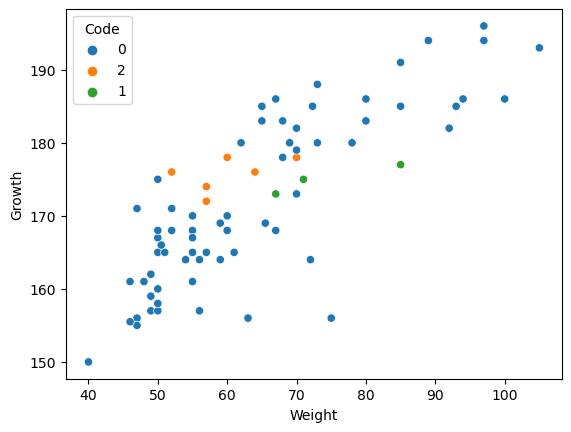

In [115]:
sns.scatterplot(data=test_data_cut, x="Weight", y="Growth", hue="Code")

#### Линейный классификатор

In [116]:
from sklearn.linear_model import SGDClassifier

In [117]:
df_cut = data[["Growth", "Weight", "Sex"]].copy().dropna()

<Axes: xlabel='Weight', ylabel='Growth'>

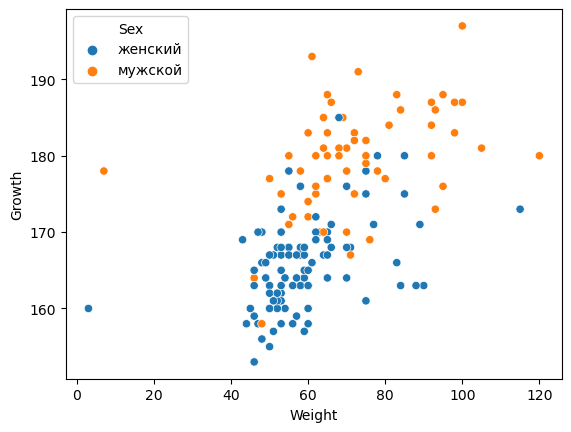

In [118]:
sns.scatterplot(data=df_cut, x="Weight", y="Growth", hue="Sex")

In [119]:
scaler = StandardScaler()
scaler.fit(df_cut[["Weight", "Growth"]].values.reshape(-1, 2))
arr = scaler.transform(df_cut[["Weight", "Growth"]].values.reshape(-1, 2))

In [128]:
model = SGDClassifier()
model.fit(arr, y=df_cut["Sex"].values)

SGDClassifier()

In [121]:
test_data_cut = test_data[["Growth", "Weight", "Sex"]].copy().dropna()

In [122]:
arr_test = scaler.transform(test_data_cut[["Weight", "Growth"]].values.reshape(-1, 2))

In [123]:
test_data_cut['Predicted_sex']=model.predict(arr_test)

In [124]:
print(accuracy_score(test_data_cut["Predicted_sex"], test_data_cut["Sex"]))

0.8961038961038961


In [125]:
pd.crosstab(test_data_cut["Predicted_sex"], test_data_cut["Sex"])

Sex,женский,мужской
Predicted_sex,,
женский,41,2
мужской,6,28


In [126]:
test_data_cut["Code"] = "0"
test_data_cut.loc[
    (test_data_cut["Sex"] == "мужской") & (test_data_cut["Predicted_sex"] == "женский"),
    "Code",
] = "1"
test_data_cut.loc[
    (test_data_cut["Sex"] == "женский") & (test_data_cut["Predicted_sex"] == "мужской"),
    "Code",
] = "2"

<Axes: xlabel='Weight', ylabel='Growth'>

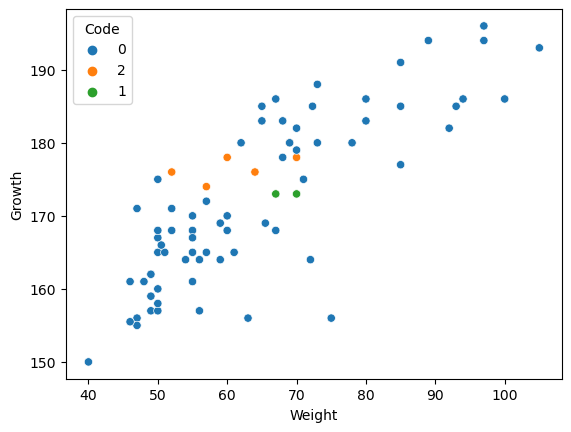

In [127]:
sns.scatterplot(data=test_data_cut, x="Weight", y="Growth", hue="Code")

Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Пронормируйте признаки 'Hair length','Shoe size' используя StandardScaler

Запустите модель KNeighborsClassifier(n_neighbors=3), и получите предсказания для студентов из тестовой выборки students_test.csv

С помощью команды pd.crosstab постройте матрицу ошибок (таблицу сопряженности) предсказанного и истинного пола студентов.

В отчет запишите количество студентов женского пола, которые были детектированы как женщины.

In [129]:
df_cut = data[["Hair length", "Shoe size", "Sex"]].copy().dropna()

<Axes: xlabel='Hair length', ylabel='Shoe size'>

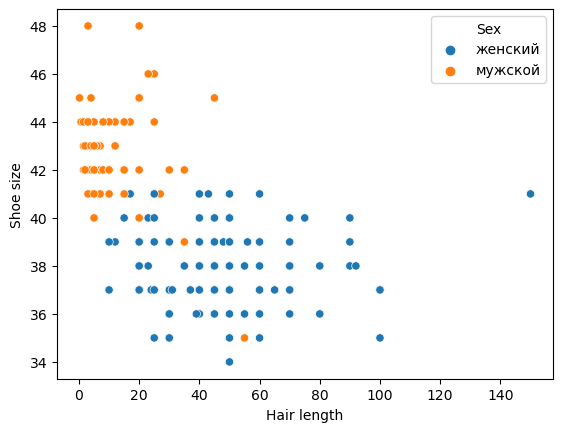

In [130]:
sns.scatterplot(data=df_cut, x="Hair length", y="Shoe size", hue="Sex")

In [131]:
scaler = StandardScaler()
scaler.fit(df_cut[["Hair length", "Shoe size"]].values.reshape(-1, 2))
arr = scaler.transform(df_cut[["Hair length", "Shoe size"]].values.reshape(-1, 2))

In [132]:
model = KNeighborsClassifier()
model.fit(arr, y=df_cut["Sex"].values)

KNeighborsClassifier()

In [133]:
test_data_cut = test_data[["Hair length", "Shoe size", "Sex"]].copy().dropna()

In [134]:
arr_test = scaler.transform(test_data_cut[["Hair length", "Shoe size"]].values.reshape(-1, 2))

In [135]:
test_data_cut['Predicted_sex']=model.predict(arr_test)

In [136]:
print(accuracy_score(test_data_cut["Predicted_sex"], test_data_cut["Sex"]))

0.9795918367346939


In [137]:
pd.crosstab(test_data_cut["Predicted_sex"], test_data_cut["Sex"])

Sex,женский,мужской
Predicted_sex,,
женский,61,1
мужской,1,35


Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Пронормируйте признаки 'Hair length','Shoe size' используя StandardScaler

Запустите модель SGDClassifier(random_state=0) (нужно написать фразу random_state=0, чтобы у всех обучающихся был одинаковый ответ), и получите предсказания для студентов из тестовой выборки students_test.csv

С помощью команды pd.crosstab постройте матрицу ошибок (таблицу сопряженности) предсказанного и истинного пола студентов.

В отчет запишите количество студентов мужского пола, которые были детектированы как мужчины.

In [149]:
df_cut = data[["Hair length", "Shoe size", "Sex"]].copy().dropna()

<Axes: xlabel='Hair length', ylabel='Shoe size'>

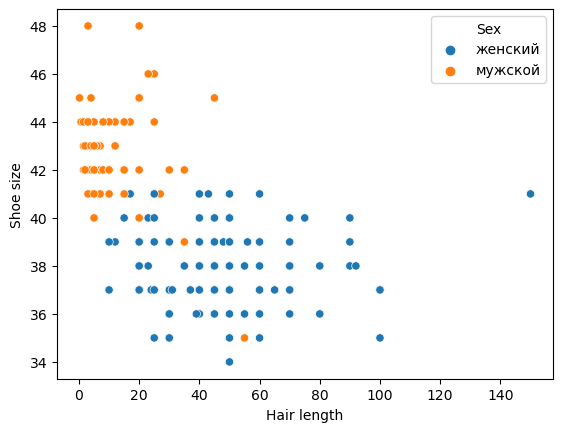

In [150]:
sns.scatterplot(data=df_cut, x="Hair length", y="Shoe size", hue="Sex")

In [151]:
scaler = StandardScaler()
scaler.fit(df_cut[["Hair length", "Shoe size"]].values.reshape(-1, 2))
arr = scaler.transform(df_cut[["Hair length", "Shoe size"]].values.reshape(-1, 2))

In [152]:
model = SGDClassifier(random_state=0)
model.fit(arr, y=df_cut["Sex"].values)

SGDClassifier(random_state=0)

In [153]:
test_data_cut = test_data[["Hair length", "Shoe size", "Sex"]].copy().dropna()

In [154]:
arr_test = scaler.transform(test_data_cut[["Hair length", "Shoe size"]].values.reshape(-1, 2))

In [155]:
test_data_cut['Predicted_sex']=model.predict(arr_test)

In [156]:
print(accuracy_score(test_data_cut["Predicted_sex"], test_data_cut["Sex"]))

0.9795918367346939


In [157]:
pd.crosstab(test_data_cut["Predicted_sex"], test_data_cut["Sex"])

Sex,женский,мужской
Predicted_sex,,
женский,61,1
мужской,1,35
